### Hamoye Energy Prediction

### Importing require modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Loading data
energy = pd.read_csv('energydata_complete.csv')
# Preview
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# checking data information
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [6]:
# Checking correlation of features with appliances
energy.corr()['Appliances']

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

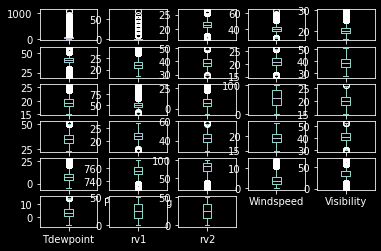

In [7]:
# Looking at outliers
from matplotlib.pyplot import figure

energy.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (20,15)
plt.show()

In [8]:
# Dropping date and light column
energy.drop(columns=['date', 'lights'], inplace=True)

In [9]:
# Rescalling data to be train on model
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(energy)
norm_df = pd.DataFrame(norm_data, columns=energy.columns)

In [10]:
# Selcting dependent and independent variable for training model
features = norm_df.drop('Appliances', axis=1)
target = norm_df['Appliances']

In [11]:
# Spltting data 70 - 30 with random state of 42
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

### Simple Linear Regression

Q12

In [12]:
# selecting features and target data. 
x = x_train[['T2']]
y = x_train['T6']
fea = x_test[['T2']]
tar = x_test['T6']

# Initializing model
linreg = LinearRegression()
# Fitting model
linreg.fit(x, y)
# making prediction
pred = linreg.predict(fea)

# Computing model performance
mae = mean_absolute_error(tar, pred)
mse = mean_squared_error(tar, pred)
rss = np.sum(np.square(tar - pred))
rmse = np.sqrt(mse)
r_square = r2_score(tar, pred)

print(mae, mse, rss, rmse, r_square)


0.08216970202681717 0.011166285957258446 66.11557915292725 0.10567064851347532 0.6427789637197382


### Multiple Linear Regression

Q13, Q14, Q15, Q16

In [13]:
# Initializing and training model
linreg = LinearRegression()
linreg.fit(x_train, y_train)
# Making prediction
pred = linreg.predict(x_test)

# Computing model performance
mae = mean_absolute_error(y_test, pred)
rss = np.sum(np.square(pred - y_test))
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r_square = r2_score(y_test, pred)

print(mae, mse, rss, rmse, r_square)

0.05013362397742957 0.007658778867195369 45.34762967266378 0.08751444947661711 0.14890246319303524


### Regularization Method

Q18

In [14]:
# Training a Ridge Regression model with alpha value of 0.4
ridreg = Ridge(alpha=0.4)
ridreg.fit(x_train, y_train)
pred = ridreg.predict(x_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rss = np.sum(np.square(y_test - pred))
rmse = np.sqrt(mse)
r_square = r2_score(y_test, pred)

print(mae, mse, rss, rmse, r_square)

0.05008744584092389 0.007662176129398587 45.36774486216903 0.08753385704628003 0.14852493545092593


Q19, Q20

In [15]:
# Training a Lasso Regression model with alpha value of 0.001
lasreg = Lasso(alpha=0.001)
lasreg.fit(x_train, y_train)
pred = lasreg.predict(x_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rss = np.sum(np.square(y_test - pred))
rmse = np.sqrt(mse)
r_square = r2_score(y_test, pred)

print(mae, mse, rss, rmse, r_square)

0.055256639821262256 0.008757535449401907 51.85336739590869 0.09358170467245137 0.026800880567125818


In [16]:
linreg.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

In [17]:
x_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

Q17

In [27]:
weights = pd.Series(linreg.coef_, x_train.columns).sort_values()
weights

RH_2          -0.456698
T_out         -0.321860
T2            -0.236178
T9            -0.189941
RH_8          -0.157595
RH_out        -0.077671
RH_7          -0.044614
RH_9          -0.039800
T5            -0.015657
T1            -0.003281
rv1            0.000770
rv2            0.000770
Press_mm_hg    0.006839
T7             0.010319
Visibility     0.012307
RH_5           0.016006
RH_4           0.026386
T4             0.028981
Windspeed      0.029183
RH_6           0.038049
RH_3           0.096048
T8             0.101995
Tdewpoint      0.117758
T6             0.236425
T3             0.290627
RH_1           0.553547
dtype: float64

In [28]:
df = pd.DataFrame(weights).reset_index()
df.columns = ['Features', 'Linear_model']
df['Linear_model'].round(3)

0    -0.457
1    -0.322
2    -0.236
3    -0.190
4    -0.158
5    -0.078
6    -0.045
7    -0.040
8    -0.016
9    -0.003
10    0.001
11    0.001
12    0.007
13    0.010
14    0.012
15    0.016
16    0.026
17    0.029
18    0.029
19    0.038
20    0.096
21    0.102
22    0.118
23    0.236
24    0.291
25    0.554
Name: Linear_model, dtype: float64

### Getting weight of feature performance in each model

In [22]:
def get_weights(model, feature, col_name):
    weights = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    # weights_df[col_name] =  weights_df[col_name].round(3)
    return weights_df

In [23]:
linear_weight = get_weights(linreg, x_train, 'Linear_Model_Weight')
ridge_weight = get_weights(ridreg, x_train, 'Ridge_Weight')
lasso_weight = get_weights(lasreg, x_train, 'Lasso_Weight')

Q19

In [25]:
all_weight = pd.merge(linear_weight, ridge_weight, on='Features')
all_weight = pd.merge(all_weight, lasso_weight, on='Features')
all_weight

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


Q19